# Importing Necessary Libraries
In this cell, we will import all the required libraries for handling data, performing clustering, and visualizations.


In [1]:
# Import libraries for data manipulation, clustering, and visualization
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set(style="whitegrid")


 # Loading the Dataset
In this cell, we load the TF-IDF features and headlines dataset. We also explore their shapes and check for null values to ensure the data is ready for analysis.


In [2]:
import pandas as pd
import numpy as np

# Load headlines
df = pd.read_csv("headlines.csv")
print(df.shape)  # Output: (19685, 1)

# Load TF-IDF features
tfidf_features = np.load("tfidf_features.npy")
print(tfidf_features.shape)  # Output: (19685, 1000)


(19685, 2)
(19685, 1000)


# Initial Exploration
Let's preview the dataset to understand its structure and the nature of headlines we are working with.


In [3]:
# Display the first few rows of the dataset
df.head()

# Basic statistics about the dataset
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19685 entries, 0 to 19684
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   idx       19685 non-null  int64 
 1   headline  19685 non-null  object
dtypes: int64(1), object(1)
memory usage: 307.7+ KB


,idx
count,19685.00000
mean,9842.00000
std,5682.71436
min,0.00000
25%,4921.00000
50%,9842.00000
75%,14763.00000
max,19684.00000


# Determining the Optimal Number of Clusters
Using the Elbow Method to find the optimal value of k for K-Means clustering. We'll plot the inertia values for different k values.


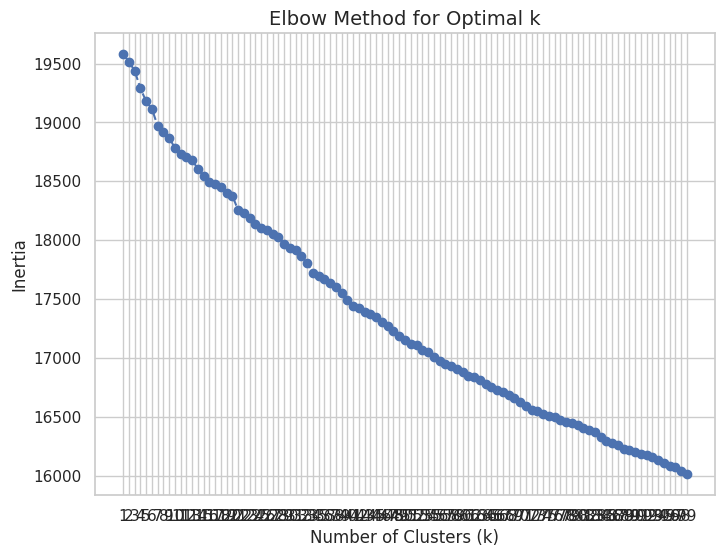

In [4]:
# Define a range of k values to explore
k_range = range(1, 100)

# Store inertia values for each k
inertia_values = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_features)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker="o", linestyle="--")
plt.title("Elbow Method for Optimal k", fontsize=14)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
plt.xticks(k_range)
plt.show()

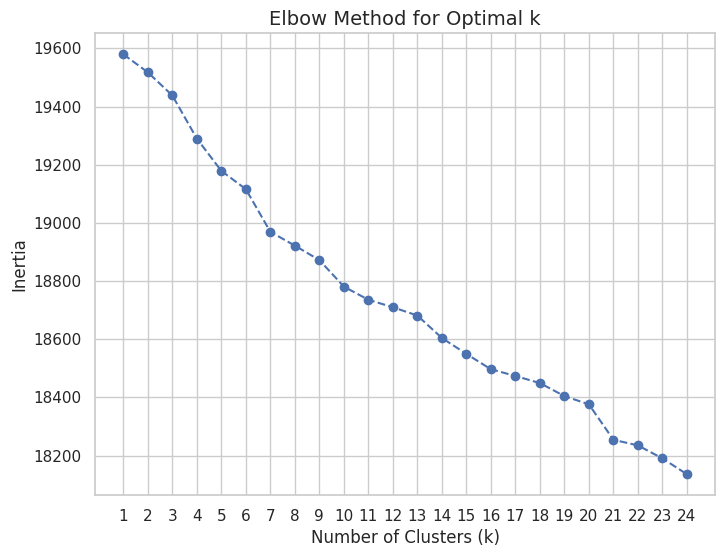

In [5]:
# Define a range of k values to explore
k_range = range(1, 25)

# Store inertia values for each k
inertia_values = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_features)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker="o", linestyle="--")
plt.title("Elbow Method for Optimal k", fontsize=14)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
plt.xticks(k_range)
plt.show()

# Observations from Elbow Curve
Identify the optimal k value based on the "elbow point" where the inertia values start to flatten.


In [6]:
# Optimal number of clusters from the Elbow Method
#lets take k=11 as before k=11 and after k=11 we can see the drop in slope
k_optimal = 11
print(f"The optimal number of clusters chosen is {k_optimal}.")


The optimal number of clusters chosen is 11.


# Performing K-Means Clustering
Now that we have determined the optimal k, we will perform K-Means clustering on the TF-IDF features.


In [7]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df["KMeans_Cluster"] = kmeans.fit_predict(tfidf_features)

# Display cluster assignments
df["KMeans_Cluster"].value_counts()


,count
KMeans_Cluster,
9,13359
4,1982
6,998
5,879
7,829
2,440
8,398
3,342
1,199


# Visualizing Cluster Distribution
Using a bar plot to display the distribution of headlines across clusters.


<ipython-input-8-9e21c97c0e9b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="KMeans_Cluster", data=df, palette="viridis")


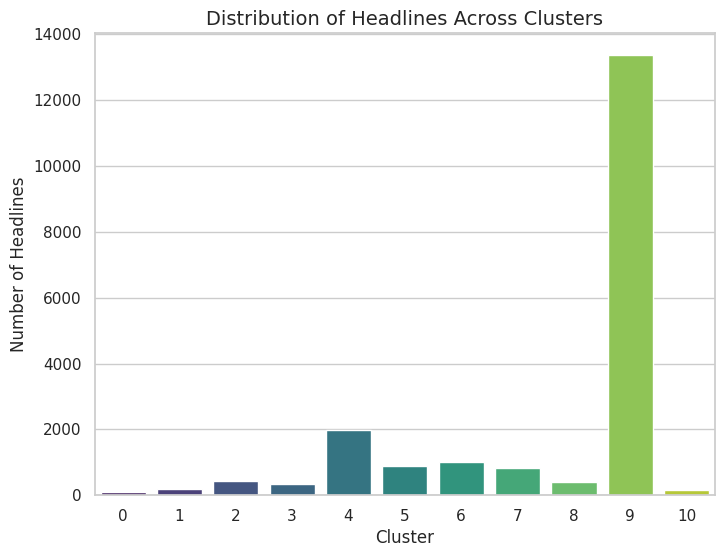

In [8]:
# Plot cluster distribution
plt.figure(figsize=(8, 6))
sns.countplot(x="KMeans_Cluster", data=df, palette="viridis")
plt.title("Distribution of Headlines Across Clusters", fontsize=14)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Number of Headlines", fontsize=12)
plt.show()


# Representative Headlines for Each Cluster
We display 10 representative headlines from each cluster to understand their themes and content.


In [9]:
# Display 10 representative headlines from each cluster
for cluster in range(k_optimal):
    print(f"Cluster {cluster} Representative Headlines:")
    print(df[df["KMeans_Cluster"] == cluster]["headline"].sample(10, random_state=42).values)
    print("\n" + "="*50 + "\n")


Cluster 0 Representative Headlines:
['Gus Kenworthy Calls Out Unchecked Homophobia On YouTube After Olympics'
 'Amid Nationwide Calls For Gun Control, A Defiant NRA Readies Its Base For Battle'
 'Hillary Clinton Calls For Michigan Gov. Rick Snyder To Resign Or Be Recalled'
 "After Perceived Snubs, UK's May Calls Trump To Strengthen Ties"
 "Obama Calls For 'Common-Sense' Gun Laws After Florida School Shooting"
 'Oregon Governor Calls On Feds To End Militia Occupation Standoff'
 'Maisie Williams Calls Out Sexism In The Entertainment Industry'
 'Anti-Apartheid Archbishop Calls Presbyterians to Back Divestment from Israeli Occupation'
 "Brenda Chapman, 'Brave' Creator, Calls Merida's Makeover 'Atrocious' [UPDATE]"
 'Phoenix Mayor Greg Stanton Calls On Trump To Delay Rally In Wake Of Charlottesville Violence']


Cluster 1 Representative Headlines:
["Ashley Judd: It's Time to Treat Gender-Based Violence as a Health Issue"
 'Now Is the Time to Start Talking About Racism in the LGBT Community'

# Dimensionality Reduction with PCA
To visualize the clustering results, we reduce the feature dimensions to 50 using PCA.


In [10]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# Assuming you already have the TF-IDF features (tfidf_features) and the original dataset (df)
# Reduce the TF-IDF matrix to 50 dimensions using PCA
pca = PCA(n_components=50)
reduced_data = pca.fit_transform(tfidf_features)

# Apply K-Means clustering to the reduced data
kmeans_pca = KMeans(n_clusters=5, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(reduced_data)

# Assign the PCA-based K-Means cluster labels to the dataframe
df['KMeans_PCA_Cluster'] = kmeans_pca_labels


In [11]:
# Apply K-Means clustering to the original TF-IDF data
kmeans_original = KMeans(n_clusters=5, random_state=42)
kmeans_original_labels = kmeans_original.fit_predict(tfidf_features)

# Assign the original K-Means cluster labels to the dataframe
df['KMeans_Original_Cluster'] = kmeans_original_labels


In [12]:
# Comparing clusters from original K-Means and PCA K-Means
for cluster in range(5):
    print(f"Original K-Means Cluster {cluster} Representative Headlines:")
    print(df[df["KMeans_Original_Cluster"] == cluster]["headline"].sample(10, random_state=42).values)
    print("\n" + "="*50 + "\n")

    print(f"PCA K-Means Cluster {cluster} Representative Headlines:")
    print(df[df["KMeans_PCA_Cluster"] == cluster]["headline"].sample(10, random_state=42).values)
    print("\n" + "="*50 + "\n")


Original K-Means Cluster 0 Representative Headlines:
["Isaac Mizrahi On The 'Right Way' For Fashion To Incorporate Plus-Size (VIDEO)"
 "GRAIL Moon VIDEO Shows NASA Craft's Lunar Orbit"
 'A Shark House Has Us Believing That Really, Anything Is Possible (VIDEO)'
 'World Cup Fervor Shows How USA Has Assimilated to Immigrant Cultures'
 "In Thailand, A Woman's Quest To Save The Asian Elephant (VIDEO)"
 "We Dare You Not To Laugh At This Ridiculous 'Doctor Who' Video"
 "Tiger Woods Nike 'Apologies' Commercial Showcases Covert Driver (VIDEO)"
 '43 Best Vines Of The Week, In One Video: Sep. 1st - Sep. 7th, 2013'
 'Ryan Snider, American Airlines Passenger, Arrested After Trying To Storm Cockpit (VIDEO)'
 'How To Peel Kiwi Fruit With A Spoon (VIDEO)']


PCA K-Means Cluster 0 Representative Headlines:
['One Month Since Maria Hit Puerto Rico, President Trump Must Commit To Long-Term Recovery'
 "Mitt Romney Can't Bring Himself To Say He'd Vote For Donald Trump"
 "'Trump Is Treason!': Protester Throw

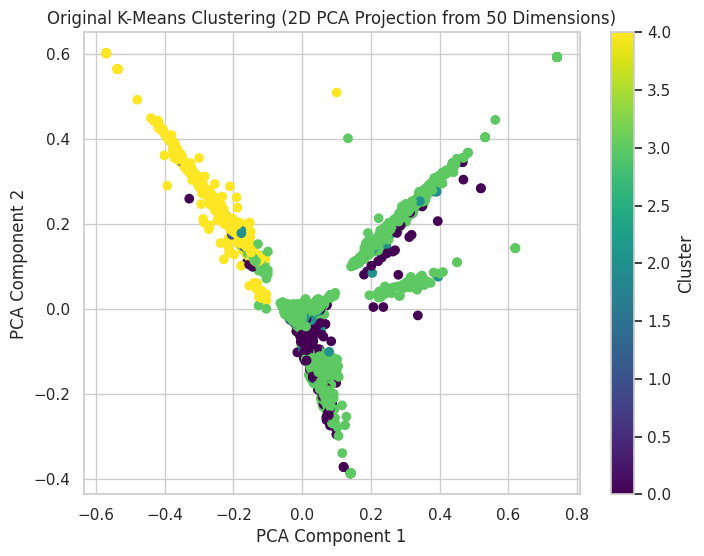

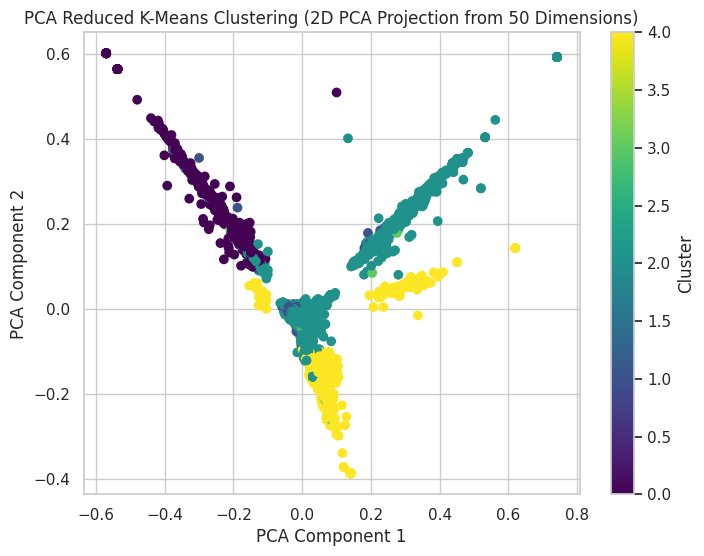

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Reduce the original TF-IDF features to 50 dimensions
pca_50 = PCA(n_components=50)
reduced_data_50 = pca_50.fit_transform(tfidf_features)

# Step 2: Further reduce the data from 50 dimensions to 2D for visualization
pca_2d = PCA(n_components=2)
reduced_data_2d = pca_2d.fit_transform(reduced_data_50)

# Visualizing the original K-Means clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_2d[:, 0], reduced_data_2d[:, 1], c=kmeans_original_labels, cmap='viridis')
plt.title("Original K-Means Clustering (2D PCA Projection from 50 Dimensions)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

# Step 3: Reduce the PCA-reduced data used in clustering to 2D
reduced_data_2d_pca = pca_2d.fit_transform(reduced_data_50)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_2d_pca[:, 0], reduced_data_2d_pca[:, 1], c=kmeans_pca_labels, cmap='viridis')
plt.title("PCA Reduced K-Means Clustering (2D PCA Projection from 50 Dimensions)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()


# Hierarchical Clustering
We perform Agglomerative Hierarchical Clustering on a random subset of 1,000 headlines and visualize the dendrogram.


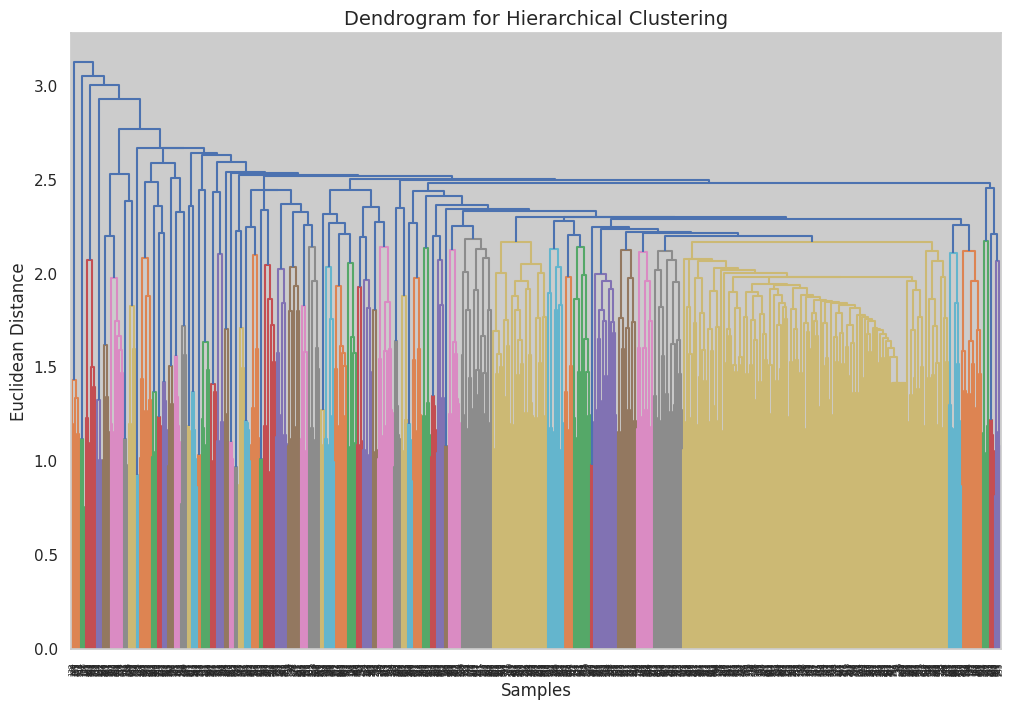

In [14]:
# Select a random subset of 1,000 headlines
subset_df = df.sample(1000, random_state=42)
subset_features = tfidf_features[subset_df.index]

# Apply Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=k_optimal)
subset_df["Hierarchical_Cluster"] = hierarchical.fit_predict(subset_features)

# Plot dendrogram
plt.figure(figsize=(12, 8))
sch.dendrogram(sch.linkage(subset_features, method="ward"))
plt.title("Dendrogram for Hierarchical Clustering", fontsize=14)
plt.xlabel("Samples", fontsize=12)
plt.ylabel("Euclidean Distance", fontsize=12)
plt.show()


# The results of Hierarchical Clustering


In [15]:
# Display representative headlines for hierarchical clusters
for cluster in range(k_optimal):
    print(f"Hierarchical Cluster {cluster} Representative Headlines:")

    # Check the number of headlines in the cluster
    cluster_headlines = subset_df[subset_df["Hierarchical_Cluster"] == cluster]["headline"]

    # If the cluster has fewer than 10 headlines, sample all of them
    sample_size = min(10, len(cluster_headlines))

    print(cluster_headlines.sample(sample_size, random_state=42).values)
    print("\n" + "="*50 + "\n")


Hierarchical Cluster 0 Representative Headlines:
["Amy Schumer Says Trump's Rosie O'Donnell Dig Showed He's 'Inhumane And Erratic'"
 "O.J. Simpson Says 'Life Is Fine' After Prison"
 "Kate Hudson Announces She's Pregnant With Her Third Child, A Baby Girl"
 "Meredith Relives Derek's Death In 'Grey's Anatomy' Sneak Peek"
 "Acceptance Of What Can't Be Changed Is Key To Satisfaction In Later Life, Research Shows"
 '‘My Daughter Is Delusional And Lying About Being 9 Months Pregnant’'
 'Craft Of The Day: Make a Pretty Vintage Doily Table Runner'
 "'Birth Of A Nation' Star Says Few Acting Roles For Black Men Have 'Integrity'"
 'You Absolutely NEED To See The Street Style In Japan'
 'People Who May Have Changed Your Life']


Hierarchical Cluster 1 Representative Headlines:
["Here's A Complete Rundown Of What Happened At The Second Presidential Debate"
 'Nike Dunks and 5 Other Creative Wedding Shoe Ideas'
 'Shopping for the Sake of Shopping'
 'Senate Hits Michael Flynn With Two New Subpoenas'
 '

# Comparison of Clustering Methods
(USed only 5 clusters to simply the comparision)

In [16]:
from sklearn.cluster import KMeans
import pandas as pd

# Assuming you already have tfidf_features and df (headlines dataset)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(tfidf_features)

# Assigning the labels to the DataFrame
df['KMeans_Cluster'] = kmeans_labels

# Inspecting cluster themes by displaying sample headlines from each cluster
for i in range(5):
    print(f"K-Means Cluster {i} Representative Headlines:")
    print(df[df["KMeans_Cluster"] == i]["headline"].sample(10, random_state=42).values)
    print("\n" + "="*50 + "\n")


K-Means Cluster 0 Representative Headlines:
["Isaac Mizrahi On The 'Right Way' For Fashion To Incorporate Plus-Size (VIDEO)"
 "GRAIL Moon VIDEO Shows NASA Craft's Lunar Orbit"
 'A Shark House Has Us Believing That Really, Anything Is Possible (VIDEO)'
 'World Cup Fervor Shows How USA Has Assimilated to Immigrant Cultures'
 "In Thailand, A Woman's Quest To Save The Asian Elephant (VIDEO)"
 "We Dare You Not To Laugh At This Ridiculous 'Doctor Who' Video"
 "Tiger Woods Nike 'Apologies' Commercial Showcases Covert Driver (VIDEO)"
 '43 Best Vines Of The Week, In One Video: Sep. 1st - Sep. 7th, 2013'
 'Ryan Snider, American Airlines Passenger, Arrested After Trying To Storm Cockpit (VIDEO)'
 'How To Peel Kiwi Fruit With A Spoon (VIDEO)']


K-Means Cluster 1 Representative Headlines:
["Why Valentine's Day Is a Good Time to Assess Your Tax Situation"
 'Now Is the Time to Start Talking About Racism in the LGBT Community'
 'Feel Like Giving Up? Now Is the Time to Fight Harder'
 'Butterfly Time I

In [17]:
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering (Agglomerative)
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(tfidf_features)

# Assigning the labels to the DataFrame
df['Hierarchical_Cluster'] = hierarchical_labels

# Inspecting cluster themes by displaying sample headlines from each cluster
for i in range(5):
    print(f"Hierarchical Cluster {i} Representative Headlines:")
    print(df[df["Hierarchical_Cluster"] == i]["headline"].sample(10, random_state=42).values)
    print("\n" + "="*50 + "\n")


Hierarchical Cluster 0 Representative Headlines:
["New Exhibition Explores Andy Warhol's Relationship With Books"
 'The Dark Ages of Queerdom'
 "The Walmart Black Friday Protest Ain't What It Used To Be"
 'How To Overcome Fear' '"Geek Love" Author Champions Film'
 'Lax Supervision Plagued Officer Sex Cases, AP Investigation Finds'
 'Of Lice and Men: IV'
 'Chrissy Teigen Says She Knows Which Actress Bit Beyoncé In The Face'
 'How Our Own Back-to-School Stress Harms Our Children'
 'Kourtney Kardashian Knows How To Dress Her Petite Figure In Style (PHOTO)']


Hierarchical Cluster 1 Representative Headlines:
["Trump Institute Fired Veteran For 'Absences' After He Was Deployed To Afghanistan"
 'Chelsea Clinton Is Sick Of The Stigma Surrounding Breastfeeding And Menstruation'
 'You Can Be Donald Trump too'
 "Connecticut Senator Not Happy With Bernie Sanders' View On Sandy Hook Lawsuit"
 'HUFFPOLLSTER: Voters Remain Very Negative About Donald Trump And Hillary Clinton'
 'Trump The Absent-Pres

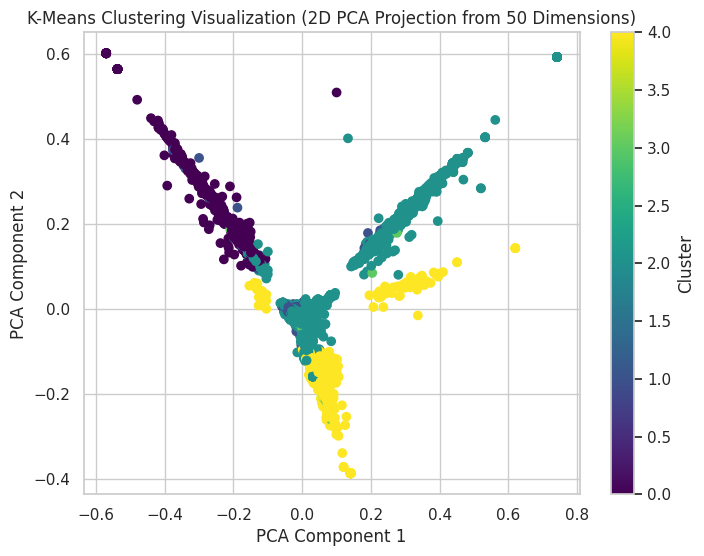

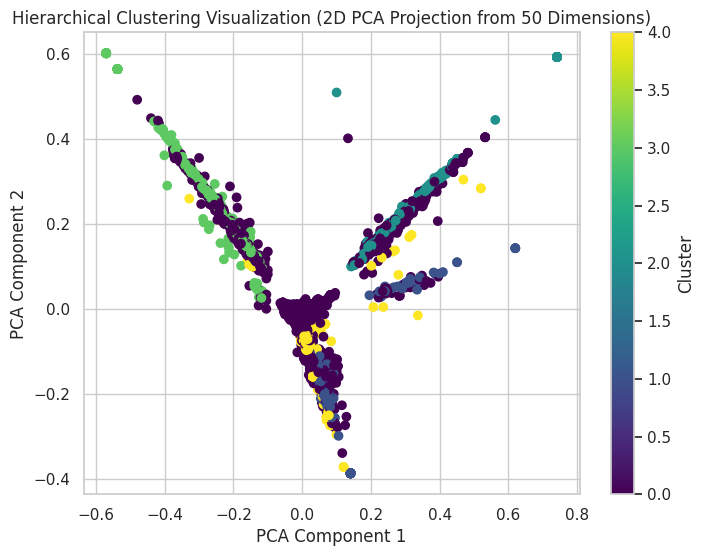

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

# Step 1: Perform PCA to reduce dimensions to 50
pca_50 = PCA(n_components=50)
reduced_data_50 = pca_50.fit_transform(tfidf_features)

# Step 2: Perform clustering
# K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust n_clusters as needed
kmeans_labels = kmeans.fit_predict(reduced_data_50)

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=5)  # Adjust n_clusters as needed
hierarchical_labels = hierarchical.fit_predict(reduced_data_50)

# Step 3: Further reduce to 2D for visualization
pca_2d = PCA(n_components=2)
reduced_data_2d = pca_2d.fit_transform(reduced_data_50)

# Step 4: Visualizing K-Means clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_2d[:, 0], reduced_data_2d[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering Visualization (2D PCA Projection from 50 Dimensions)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

# Step 5: Visualizing Hierarchical Clustering clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_2d[:, 0], reduced_data_2d[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title("Hierarchical Clustering Visualization (2D PCA Projection from 50 Dimensions)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()


In [19]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Assuming `headlines` is a list of text data (e.g., news headlines)
headlines = df['headline']

# Step 1: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_features = tfidf_vectorizer.fit_transform(headlines)

# Step 2: K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(tfidf_features)

# Step 3: Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(tfidf_features.toarray())

# Step 4: Assigning cluster labels to the DataFrame
df['KMeans_Cluster'] = kmeans_labels
df['Hierarchical_Cluster'] = hierarchical_labels

# Step 5: Extract representative themes for each cluster
print("\nComparing Themes of K-Means and Hierarchical Clusters:\n")
for i in range(5):
    print(f"Cluster {i}:")

    # Representative headlines from K-Means
    kmeans_sample = df[df['KMeans_Cluster'] == i]['headline'].sample(10, random_state=42).values
    print("  K-Means Representative Headlines:")
    for h in kmeans_sample:
        print(f"    - {h}")

    # Representative headlines from Hierarchical Clustering
    hierarchical_sample = df[df['Hierarchical_Cluster'] == i]['headline'].sample(10, random_state=42).values
    print("  Hierarchical Representative Headlines:")
    for h in hierarchical_sample:
        print(f"    - {h}")

    print("\n" + "="*80 + "\n")

# Optional: Extract top TF-IDF keywords for each cluster
def extract_top_keywords(tfidf_matrix, labels, vectorizer, n_terms=10):
    cluster_keywords = {}
    terms = vectorizer.get_feature_names_out()
    for cluster_id in set(labels):
        cluster_indices = np.where(labels == cluster_id)[0]
        cluster_tfidf = tfidf_matrix[cluster_indices].mean(axis=0)
        top_keywords_idx = np.argsort(cluster_tfidf.A.flatten())[::-1][:n_terms]
        cluster_keywords[cluster_id] = [terms[i] for i in top_keywords_idx]
    return cluster_keywords

# Extract keywords for K-Means
kmeans_keywords = extract_top_keywords(tfidf_features, kmeans_labels, tfidf_vectorizer)
print("K-Means Cluster Keywords:")
for cluster, keywords in kmeans_keywords.items():
    print(f"  Cluster {cluster}: {', '.join(keywords)}")

print("\n" + "="*80 + "\n")

# Extract keywords for Hierarchical Clustering
hierarchical_keywords = extract_top_keywords(tfidf_features, hierarchical_labels, tfidf_vectorizer)
print("Hierarchical Cluster Keywords:")
for cluster, keywords in hierarchical_keywords.items():
    print(f"  Cluster {cluster}: {', '.join(keywords)}")



Comparing Themes of K-Means and Hierarchical Clusters:

Cluster 0:
  K-Means Representative Headlines:
    - Trump Calls North Korea 'Cruel Dictatorship,' Slams Kim As 'Depraved' In Speech
    - Texas Governor Calls Arrest Of Ahmed Mohamed A 'Tragic Situation'
    - Colorism and the Most Beautiful Woman
    - California Makes History, Calls On Insurance Companies To Divest From Coal
    - Ukulele Virtuoso Nails It With Stirring Rendition Of 'America The Beautiful'
    - Democrat Accuses Kirstjen Nielsen Of 'Outright Lies' On Border, Calls For Hearing
    - Tyrese Gibson Calls On A 'Good' Cop To Talk About The Latest Violence
    - This Dance Inspired By 'Moonlight' Is Almost As Gorgeous As The Real Thing
    - Valise's 'Don't Forget Me' Video Is A Beautiful Game Of Adult Telephone
    - Moving to China: Why a Little Crazy is a Good Thing
  Hierarchical Representative Headlines:
    - Donald Trump Invokes 'Pervert' Anthony Weiner In Ad Attacking Hillary Clinton
    - Why Trump Would Al

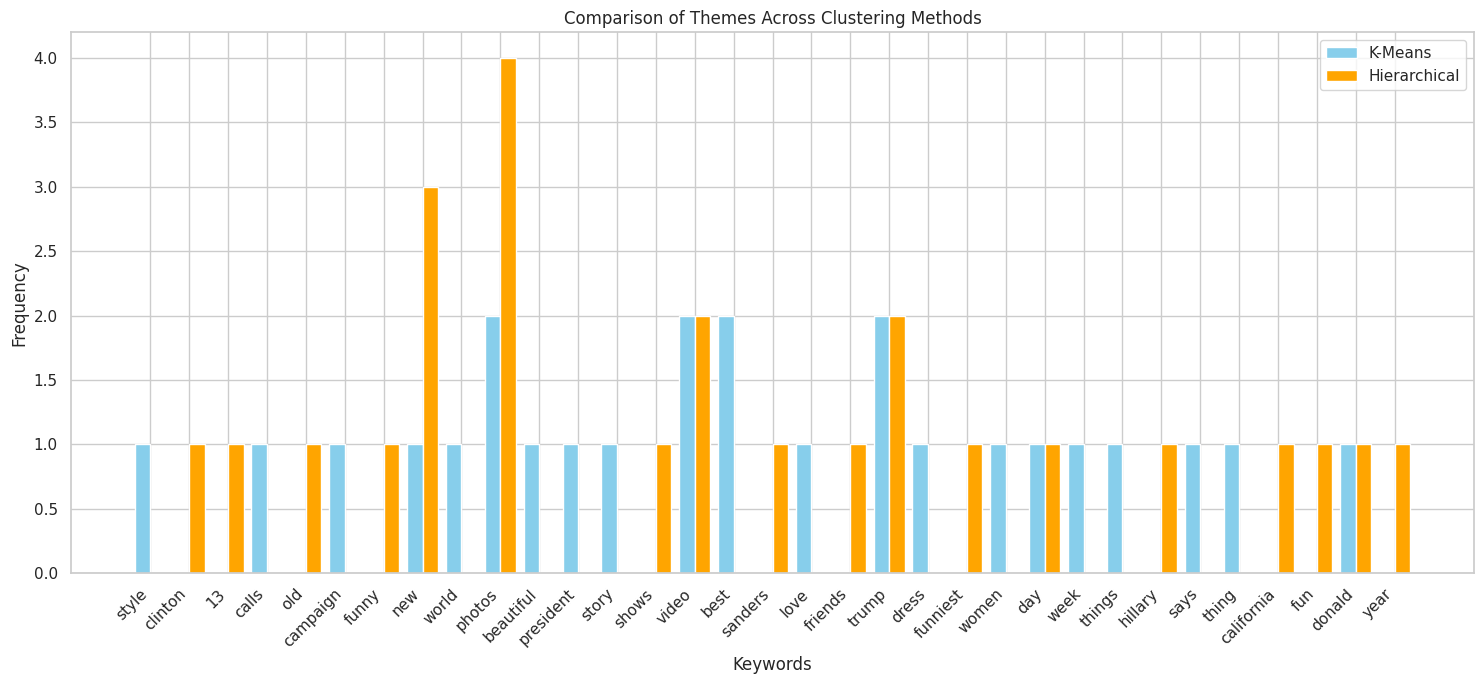

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Extract top keywords for each cluster (defined earlier in extract_top_keywords)
kmeans_keywords = extract_top_keywords(tfidf_features, kmeans_labels, tfidf_vectorizer, n_terms=5)
hierarchical_keywords = extract_top_keywords(tfidf_features, hierarchical_labels, tfidf_vectorizer, n_terms=5)

# Combine keywords into a dictionary for plotting
def prepare_keyword_plot_data(cluster_keywords):
    all_keywords = {}
    for cluster, keywords in cluster_keywords.items():
        for keyword in keywords:
            if keyword in all_keywords:
                all_keywords[keyword] += 1
            else:
                all_keywords[keyword] = 1
    return all_keywords

kmeans_data = prepare_keyword_plot_data(kmeans_keywords)
hierarchical_data = prepare_keyword_plot_data(hierarchical_keywords)

# Combine the two methods' data for shared keywords
keywords = list(set(kmeans_data.keys()).union(set(hierarchical_data.keys())))
kmeans_values = [kmeans_data.get(word, 0) for word in keywords]
hierarchical_values = [hierarchical_data.get(word, 0) for word in keywords]

# Create a bar chart
x = np.arange(len(keywords))  # keyword indices
width = 0.4

plt.figure(figsize=(15, 7))
plt.bar(x - width/2, kmeans_values, width, label='K-Means', color='skyblue')
plt.bar(x + width/2, hierarchical_values, width, label='Hierarchical', color='orange')

plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Comparison of Themes Across Clustering Methods')
plt.xticks(x, keywords, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


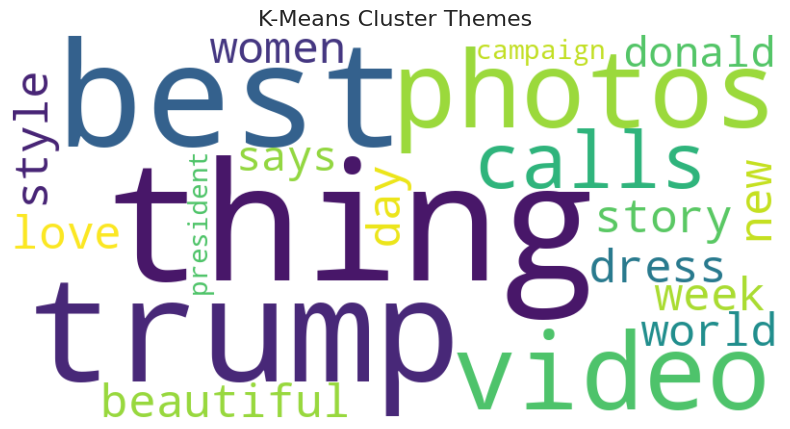

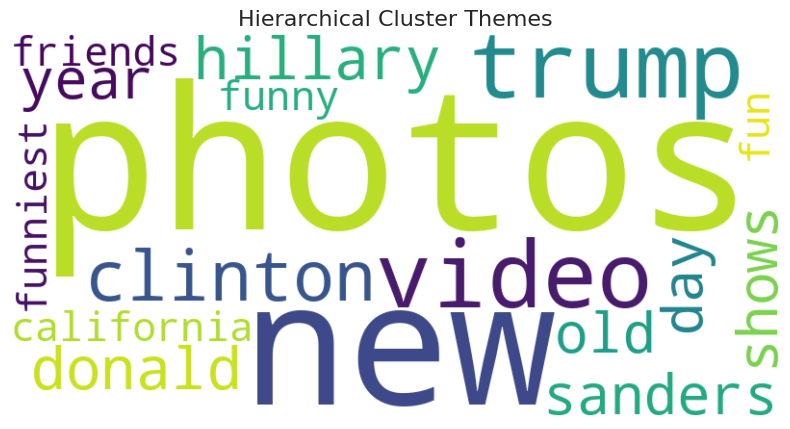

In [21]:
from wordcloud import WordCloud

# Generate a word cloud from the keywords
def generate_wordcloud(cluster_keywords, title):
    keyword_text = " ".join([f"{key} " * count for key, count in prepare_keyword_plot_data(cluster_keywords).items()])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keyword_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Word clouds for K-Means and Hierarchical Clustering
generate_wordcloud(kmeans_keywords, "K-Means Cluster Themes")
generate_wordcloud(hierarchical_keywords, "Hierarchical Cluster Themes")


In [22]:
# Function to extract top keywords/themes for clusters
def extract_top_keywords(tfidf_matrix, labels, vectorizer, n_terms=5):
    themes = {}
    terms = vectorizer.get_feature_names_out()
    for cluster_id in set(labels):
        # Get the indices of the samples in the current cluster
        cluster_indices = np.where(labels == cluster_id)[0]
        # Compute the mean TF-IDF vector for the cluster
        cluster_tfidf = tfidf_matrix[cluster_indices].mean(axis=0)
        # Get the top keywords
        top_keywords_idx = np.argsort(cluster_tfidf.A.flatten())[::-1][:n_terms]
        themes[cluster_id] = [terms[i] for i in top_keywords_idx]
    return themes

# Extract top themes for K-Means and Hierarchical Clustering
kmeans_themes = extract_top_keywords(tfidf_features, kmeans_labels, tfidf_vectorizer, n_terms=5)
hierarchical_themes = extract_top_keywords(tfidf_features, hierarchical_labels, tfidf_vectorizer, n_terms=5)


In [23]:
from sklearn.metrics import jaccard_score

# Function to compute Jaccard similarity for themes
def compute_jaccard_similarity(themes1, themes2):
    jaccard_matrix = np.zeros((len(themes1), len(themes2)))
    for i, theme1 in themes1.items():
        for j, theme2 in themes2.items():
            set1, set2 = set(theme1), set(theme2)
            # Jaccard similarity: Intersection over Union
            jaccard_matrix[i, j] = len(set1 & set2) / len(set1 | set2)
    return jaccard_matrix

# Compute the similarity matrix
similarity_matrix = compute_jaccard_similarity(kmeans_themes, hierarchical_themes)


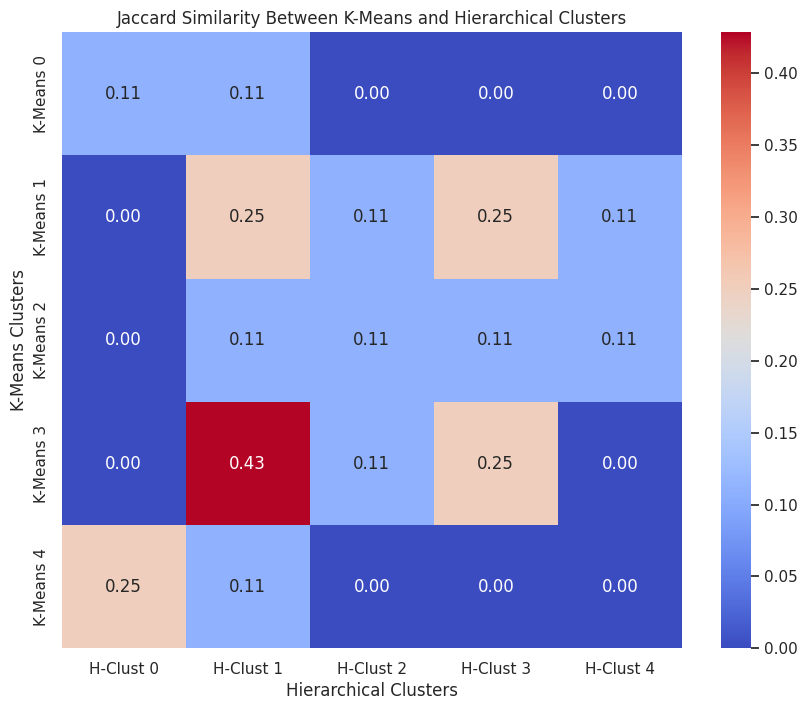

In [24]:
import seaborn as sns

# Visualize the similarity matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=[f"H-Clust {i}" for i in range(len(hierarchical_themes))],
            yticklabels=[f"K-Means {i}" for i in range(len(kmeans_themes))])

plt.title("Jaccard Similarity Between K-Means and Hierarchical Clusters")
plt.xlabel("Hierarchical Clusters")
plt.ylabel("K-Means Clusters")
plt.show()


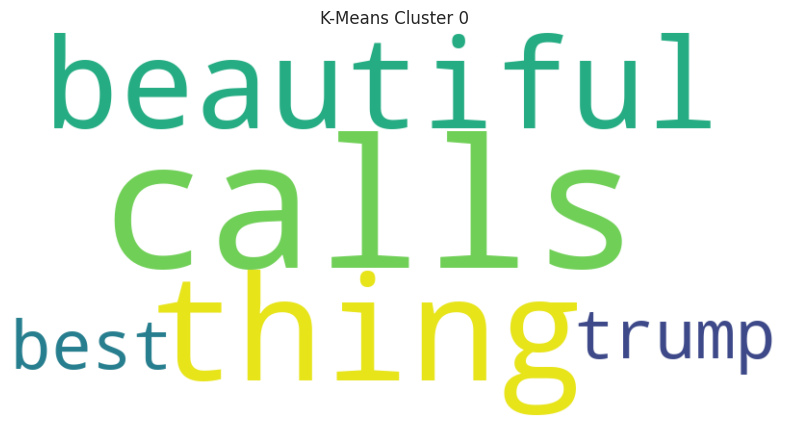

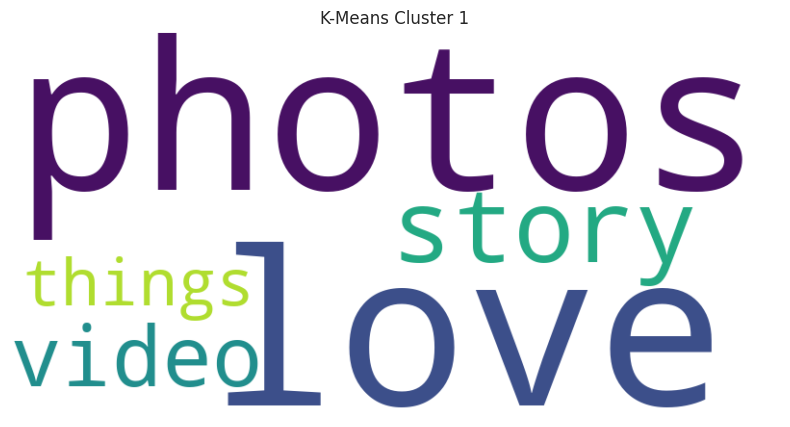

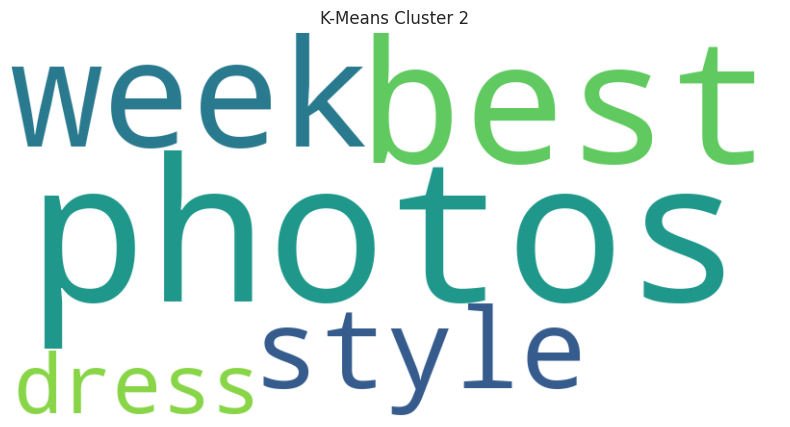

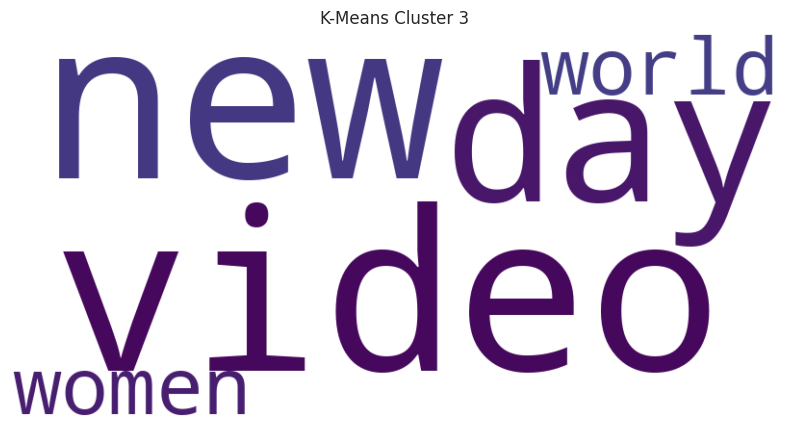

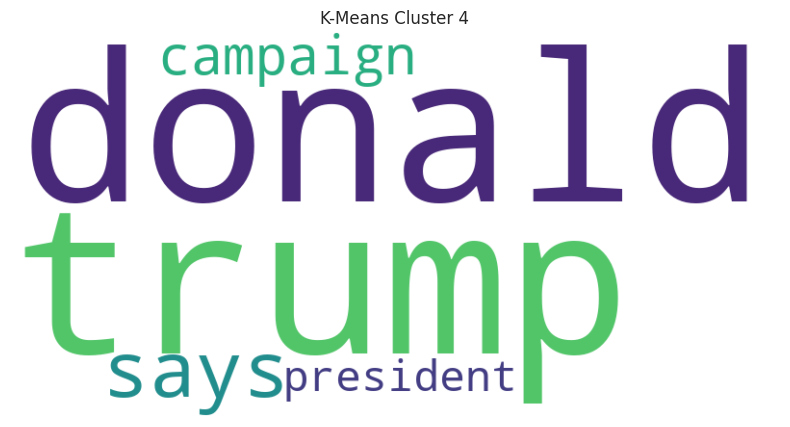

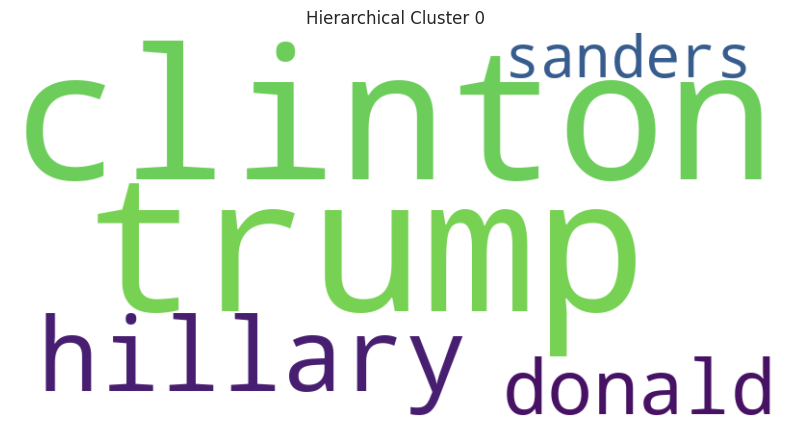

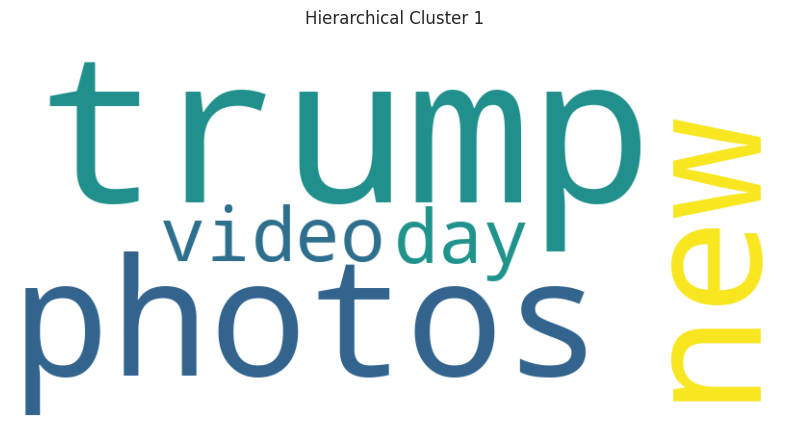

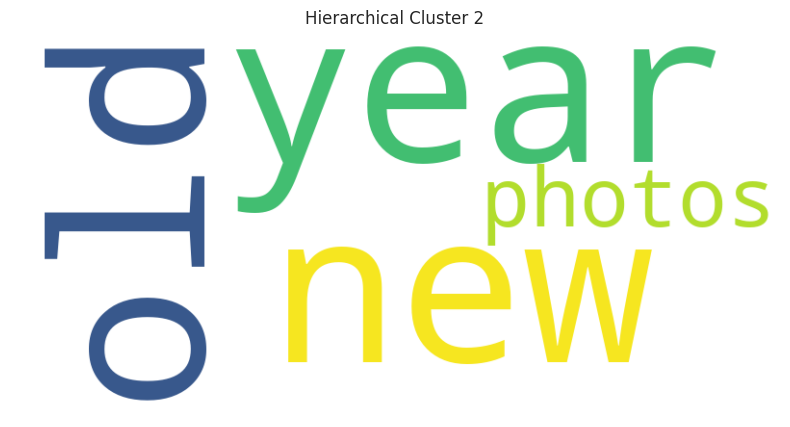

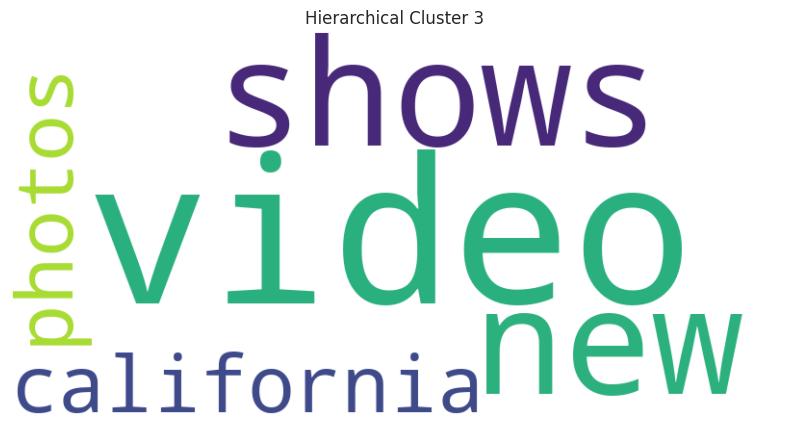

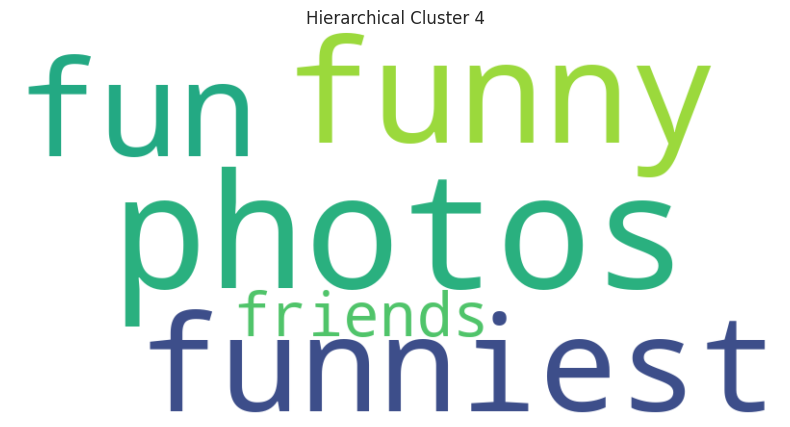

In [25]:
from wordcloud import WordCloud

# Generate word clouds for a clustering method
def generate_wordclouds(themes, title_prefix):
    for cluster_id, keywords in themes.items():
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(keywords))
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"{title_prefix} Cluster {cluster_id}")
        plt.axis('off')
        plt.show()

# Generate word clouds for K-Means and Hierarchical Clustering
generate_wordclouds(kmeans_themes, "K-Means")
generate_wordclouds(hierarchical_themes, "Hierarchical")
